# ML Pipeline Preparation
Follow the instructions below to help you create your ML pipeline.
### 1. Import libraries and load data from database.
- Import Python libraries
- Load dataset from database with [`read_sql_table`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_sql_table.html)
- Define feature and target variables X and Y

In [1]:
# import libraries
import sqlite3
import pandas as pd
import numpy as np
from sqlalchemy import create_engine

In [2]:
# load data from database
engine = create_engine('sqlite:///Disaster_Response_Database.db')
df = pd.read_sql("SELECT * FROM Disaster_Response_Database", engine)
y_cols=[]
for i in df.columns:
    if i not in ['id','message','original','genre']:
        y_cols.append(i)
df=df.dropna(subset=y_cols)
X = df['message']

y=df[y_cols]

In [6]:
print(X.shape)
X.isnull().sum()

(26039,)


0

In [7]:
print(y.shape)
y.isnull().sum()

(26039, 36)


related                   0
request                   0
offer                     0
aid_related               0
medical_help              0
medical_products          0
search_and_rescue         0
security                  0
military                  0
child_alone               0
water                     0
food                      0
shelter                   0
clothing                  0
money                     0
missing_people            0
refugees                  0
death                     0
other_aid                 0
infrastructure_related    0
transport                 0
buildings                 0
electricity               0
tools                     0
hospitals                 0
shops                     0
aid_centers               0
other_infrastructure      0
weather_related           0
floods                    0
storm                     0
fire                      0
earthquake                0
cold                      0
other_weather             0
direct_report       

### 2. Write a tokenization function to process your text data

In [3]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk import pos_tag
import re

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /home/pranay/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/pranay/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/pranay/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/pranay/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [4]:
stop_words = stopwords.words("english")
lemmatizer = WordNetLemmatizer()

In [5]:
def tokenize(text):
    # normalize case and remove punctuation
    text = re.sub(r"[^a-zA-Z0-9]", " ", text.lower())
    
    # tokenize text
    tokens = word_tokenize(text)
    
    # lemmatize and remove the stop words
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]    
    
    return tokens

### 3. Build a machine learning pipeline
This machine pipeline should take in the `message` column as input and output classification results on the other 36 categories in the dataset. You may find the [MultiOutputClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.multioutput.MultiOutputClassifier.html) helpful for predicting multiple target variables.

In [6]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.model_selection import GridSearchCV
from sklearn.multioutput import MultiOutputClassifier

pipeline = Pipeline([('vect',CountVectorizer(tokenizer=tokenize)),\
                     ('transformer',TfidfTransformer(smooth_idf=False)),\
                     ('clf',MultiOutputClassifier(KNeighborsClassifier()))
                    ])

### 4. Train pipeline
- Split data into train and test sets
- Train pipeline

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25,random_state=42)

In [13]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('vect',
                 CountVectorizer(tokenizer=<function tokenize at 0x7f16d14b7f80>)),
                ('transformer', TfidfTransformer(smooth_idf=False)),
                ('clf',
                 MultiOutputClassifier(estimator=KNeighborsClassifier()))])

### 5. Test your model
Report the f1 score, precision and recall for each output category of the dataset. You can do this by iterating through the columns and calling sklearn's `classification_report` on each.

In [14]:
from sklearn.metrics import classification_report
y_pred=pipeline.predict(X_test)      
y_pred

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [15]:
print(classification_report(y_test.values, y_pred, target_names=y_cols) ) 

/home/pranay/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/pranay/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                        precision    recall  f1-score   support

               related       0.76      0.92      0.83      4931
               request       0.35      0.02      0.05      1138
                 offer       0.00      0.00      0.00        32
           aid_related       0.32      0.01      0.03      2668
          medical_help       0.00      0.00      0.00       507
      medical_products       0.00      0.00      0.00       327
     search_and_rescue       0.00      0.00      0.00       200
              security       0.00      0.00      0.00       125
              military       0.00      0.00      0.00       197
           child_alone       0.00      0.00      0.00         0
                 water       0.00      0.00      0.00       412
                  food       0.00      0.00      0.00       726
               shelter       0.00      0.00      0.00       585
              clothing       0.00      0.00      0.00        93
                 money       0.00      

/home/pranay/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/pranay/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### 6. Improve your model
Use grid search to find better parameters. 

#### In the code cell below we are optimizing the MultiOutputClassifier KNearestNeighbor classfier

In [16]:
parameters = {'clf__estimator__p': [1, 2]
             }

cv = GridSearchCV(pipeline, param_grid=parameters)

### 7. Test your model
Show the accuracy, precision, and recall of the tuned model.  

Since this project focuses on code quality, process, and  pipelines, there is no minimum performance metric needed to pass. However, make sure to fine tune your models for accuracy, precision and recall to make your project stand out - especially for your portfolio!

In [17]:
cv.fit(X_train,y_train)

GridSearchCV(estimator=Pipeline(steps=[('vect',
                                        CountVectorizer(tokenizer=<function tokenize at 0x7f16d14b7f80>)),
                                       ('transformer',
                                        TfidfTransformer(smooth_idf=False)),
                                       ('clf',
                                        MultiOutputClassifier(estimator=KNeighborsClassifier()))]),
             param_grid={'clf__estimator__p': [1, 2]})

In [18]:
y_pred2=cv.predict(X_test)

In [19]:
print(classification_report(y_test, y_pred2, target_names=y_cols) ) 

/home/pranay/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/pranay/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                        precision    recall  f1-score   support

               related       0.76      0.83      0.79      4931
               request       0.33      0.02      0.04      1138
                 offer       0.00      0.00      0.00        32
           aid_related       0.29      0.01      0.02      2668
          medical_help       0.00      0.00      0.00       507
      medical_products       0.00      0.00      0.00       327
     search_and_rescue       0.00      0.00      0.00       200
              security       0.00      0.00      0.00       125
              military       0.00      0.00      0.00       197
           child_alone       0.00      0.00      0.00         0
                 water       0.00      0.00      0.00       412
                  food       0.20      0.00      0.00       726
               shelter       0.00      0.00      0.00       585
              clothing       0.00      0.00      0.00        93
                 money       0.00      

/home/pranay/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/pranay/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


related                   19953.0
request                    4439.0
offer                       118.0
aid_related               10786.0
medical_help               2071.0
medical_products           1300.0
search_and_rescue           723.0
security                    469.0
military                    854.0
child_alone                   0.0
water                      1655.0
food                       2906.0
shelter                    2295.0
clothing                    399.0
money                       601.0
missing_people              298.0
refugees                    869.0
death                      1186.0
other_aid                  3425.0
infrastructure_related     1695.0
transport                  1193.0
buildings                  1325.0
electricity                 529.0
tools                       158.0
hospitals                   281.0
shops                       119.0
aid_centers                 306.0
other_infrastructure       1145.0
weather_related            7250.0
floods        

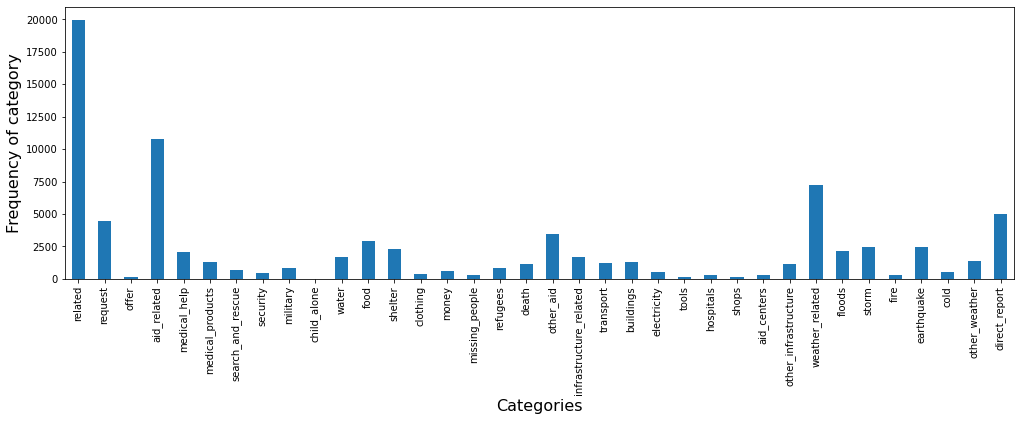

In [34]:
import matplotlib.pyplot as plt
plt.figure(figsize = (17,5))
y_sum=y.sum()

y_sum.name="Total"
print(y_sum)
ax=y_sum.plot(kind='bar')
plt.ylabel("Frequency of category",fontsize=16)
plt.xlabel("Categories",fontsize=16)
plt.savefig('y_sum.png', dpi=400, bbox_inches='tight')

#### From the above figure we observe that many categories has very number of observations, therefore for many categories we were observing precision and recall both coming out to be zero. This led to the *UndefinedMetricWarning*

### 8. Try improving your model further. Here are a few ideas:
* try other machine learning algorithms
* add other features besides the TF-IDF

In [8]:
from sklearn.base import BaseEstimator, TransformerMixin

#### We have custom made two custom tranformers: NounCounter and VerbCounter. These transformers count number of noun (NounCounter) and verbs (VerbCounter) in a given text. On literature survey we found that these features will help us to classify the text better, and the reference can be found [here](https://www.analyticsvidhya.com/blog/2018/04/a-comprehensive-guide-to-understand-and-implement-text-classification-in-python/)

In [9]:
class NounCounter(BaseEstimator, TransformerMixin):
    
    def noun_counter(self,text):
        sentence_list = sent_tokenize(text)
        count=0
        for i in sentence_list:
            word_list=word_tokenize(i)
            pos_words=pos_tag(word_list)
            for ii,jj in pos_words:
                if jj in ['NN','NNS','NNP','NNPS']:
                    count=count+1
        return count
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X_noun_counted = pd.Series(X).apply(self.noun_counter)
        return pd.DataFrame(X_noun_counted)
                

class VerbCounter(BaseEstimator, TransformerMixin):
    
    def verb_counter(self,text):
        sentence_list = sent_tokenize(text)
        count=0
        for i in sentence_list:
            word_list=word_tokenize(i)
            pos_words=pos_tag(word_list)
            for ii,jj in pos_words:
                if jj in ['VB','VBD','VBG','VBN','VBP','VBZ']:
                    count=count+1
        return count
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X_verb_counted = pd.Series(X).apply(self.verb_counter)
        return pd.DataFrame(X_verb_counted)

#### The new Classifier we are trying is the Random forest classifier

In [10]:
from sklearn.ensemble import RandomForestClassifier

pipeline2 = Pipeline([\
                      ('features',FeatureUnion([\
                                                ('nlp_pipeline',Pipeline([\
                                                                         ('vect',CountVectorizer(tokenizer=tokenize)),
                                                                          ('transformer',TfidfTransformer(smooth_idf=False))
                                                                         ])),
                                                ('counting_noun',NounCounter()),
                                                ('counting_verb',VerbCounter())
                                               ])
                      ),
                      ('clf',MultiOutputClassifier(RandomForestClassifier()))
                     ])

In [11]:
parameters2={'clf__estimator__n_estimators': [50, 100, 200],\
            }
cv2 = GridSearchCV(pipeline2, param_grid=parameters2)

In [12]:
cv2.fit(X_train,y_train)

GridSearchCV(estimator=Pipeline(steps=[('features',
                                        FeatureUnion(transformer_list=[('nlp_pipeline',
                                                                        Pipeline(steps=[('vect',
                                                                                         CountVectorizer(tokenizer=<function tokenize at 0x7fa7b22d1cb0>)),
                                                                                        ('transformer',
                                                                                         TfidfTransformer(smooth_idf=False))])),
                                                                       ('counting_noun',
                                                                        NounCounter()),
                                                                       ('counting_verb',
                                                                        VerbCounter())])),
                 

In [13]:
y_pred=cv2.predict(X_test)

In [24]:
cv2.best_estimator_.named_steps["clf"]

MultiOutputClassifier(estimator=RandomForestClassifier(n_estimators=200))

In [16]:
print(classification_report(y_test, y_pred, target_names=y_cols) ) 

/home/pranay/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/pranay/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                        precision    recall  f1-score   support

               related       0.76      0.98      0.86      4931
               request       0.47      0.05      0.09      1138
                 offer       0.00      0.00      0.00        32
           aid_related       0.45      0.19      0.26      2668
          medical_help       0.00      0.00      0.00       507
      medical_products       0.00      0.00      0.00       327
     search_and_rescue       0.00      0.00      0.00       200
              security       0.00      0.00      0.00       125
              military       0.00      0.00      0.00       197
           child_alone       0.00      0.00      0.00         0
                 water       0.20      0.00      0.00       412
                  food       0.17      0.00      0.01       726
               shelter       0.12      0.01      0.01       585
              clothing       0.00      0.00      0.00        93
                 money       0.00      

/home/pranay/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/pranay/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### 9. Export your model as a pickle file

In [29]:
import pickle
import os
os.getcwd()
pickle.dump(cv2.best_estimator_, open('/home/pranay/Workspace/Udacity/Data_Science/Project2/classifier.pkl', 'wb'))

### 10. Use this notebook to complete `train.py`
Use the template file attached in the Resources folder to write a script that runs the steps above to create a database and export a model based on a new dataset specified by the user.